In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# read csv file
review = pd.read_csv('review.csv')


In [3]:
review.head()

review_id                 user_id             business_id  \
0  xQY8N_XvtGbearJ5X4QryQ  OwjRMXRC0KyPrIlcjaXeFQ  -MhfebM0QIsKt87iDN-FNw   
1  UmFMZ8PyXZTY2QcwzsfQYA  nIJD_7ZXHq-FX8byPMOkMQ  lbrU8StCq3yDfr-QMnGrmQ   
2  LG2ZaYiOgpr2DK_90pYjNw  V34qejxNsCbcgD8C0HVk-Q  HQl28KMwrEKHqhFrrDqVNQ   
3  i6g_oA9Yf9Y31qt0wibXpw  ofKDkJKXSKZXu5xJNGiiBQ  5JxlZaqCnk1MnbgRirs40Q   
4  6TdNDKywdbjoTkizeMce8A  UgMW8bLE0QMJDCkQ1Ax5Mg  IS4cv902ykd8wj1TR0N3-A   

   stars  useful  funny  cool  \
0    2.0       5      0     0   
1    1.0       1      1     0   
2    5.0       1      0     0   
3    1.0       0      0     0   
4    4.0       0      0     0   

                                                text                 date  
0  As someone who has worked with many museums, I...  2015-04-15 05:21:16  
1  I am actually horrified this place is still in...  2013-12-07 03:16:52  
2  I love Deagan's. I do. I really do. The atmosp...  2015-12-05 03:18:11  
3  Dismal, lukewarm, defrosted-tasting "TexMex" g...  2011-05-27 05:30:52  
4  Oh happy day, finally have a Canes near my cas...  2017-01-14 21:56:57

In [78]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_id    50000 non-null  object 
 1   user_id      50000 non-null  object 
 2   business_id  50000 non-null  object 
 3   stars        50000 non-null  float64
 4   useful       50000 non-null  int64  
 5   funny        50000 non-null  int64  
 6   cool         50000 non-null  int64  
 7   text         50000 non-null  object 
 8   date         50000 non-null  object 
 9   target       50000 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 3.8+ MB


In [4]:
business = pd.read_csv('business.csv')

In [5]:
business.head()

business_id                      name  \
0  f9NumwFMBDn751xgFiRbNA  The Range At Lake Norman   
1  Yzvjg0SayhoZgCljUJRF9Q         Carlos Santo, NMD   
2  XNoUzKckATkOD1hP6vghZg                   Felinus   
3  6OAZjbxqM5ol29BuHsil3w      Nevada House of Hose   
4  51M2Kk903DFYI6gnB5I6SQ   USE MY GUY SERVICES LLC   

                     address             city state postal_code   latitude  \
0            10913 Bailey Rd        Cornelius    NC       28031  35.462724   
1  8880 E Via Linda, Ste 107       Scottsdale    AZ       85258  33.569404   
2      3554 Rue Notre-Dame O         Montreal    QC     H4C 1P4  45.479984   
3             1015 Sharp Cir  North Las Vegas    NV       89030  36.219728   
4         4827 E Downing Cir             Mesa    AZ       85205  33.428065   

    longitude  stars  review_count  is_open  \
0  -80.852612    3.5            36        1   
1 -111.890264    5.0             4        1   
2  -73.580070    5.0             5        1   
3 -115.127725    2.5             3        0   
4 -111.726649    4.5            26        1   

                                          attributes  \
0  {'BusinessAcceptsCreditCards': 'True', 'BikePa...   
1  {'GoodForKids': 'True', 'ByAppointmentOnly': '...   
2                                                NaN   
3  {'BusinessAcceptsCreditCards': 'True', 'ByAppo...   
4  {'BusinessAcceptsCreditCards': 'True', 'ByAppo...   

                                          categories  \
0  Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...   
1  Health & Medical, Fitness & Instruction, Yoga,...   
2                   Pets, Pet Services, Pet Groomers   
3  Hardware Stores, Home Services, Building Suppl...   
4  Home Services, Plumbing, Electricians, Handyma...   

                                               hours  
0  {'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...  
1                                                NaN  
2                                                NaN  
3  {'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ...  
4  {'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '...

In [79]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   50000 non-null  object 
 1   name          49999 non-null  object 
 2   address       47900 non-null  object 
 3   city          50000 non-null  object 
 4   state         50000 non-null  object 
 5   postal_code   49874 non-null  object 
 6   latitude      50000 non-null  float64
 7   longitude     50000 non-null  float64
 8   stars         50000 non-null  float64
 9   review_count  50000 non-null  int64  
 10  is_open       50000 non-null  int64  
 11  attributes    42973 non-null  object 
 12  categories    49862 non-null  object 
 13  hours         39086 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 5.3+ MB


<h3> Get the total numbers of different reviews </h3>

In [6]:
print('The number of total reviews is : {}'.format(len(review)))
print('The number of useful reviews is : {}'.format(len(review[review['useful']>0])))
print('The number of funny reviews is : {}'.format(len(review[review['funny']>0])))
print('The number of cool reviews is : {}'.format(len(review[review['cool']>0])))




The number of total reviews is : 50000
The number of useful reviews is : 22025
The number of funny reviews is : 9148
The number of cool reviews is : 11489


In [7]:
print('There are {} positive reviews'.format(len(review[review['stars']>3])))
print('There are {} neutral reviews'.format(len(review[review['stars'] == 3])))
print('There are {} negative reviews'.format(len(review[review['stars']<3])))

There are 33450 positive reviews
There are 5605 neutral reviews
There are 10945 negative reviews


<h3> Plot the stars distribution </h3>

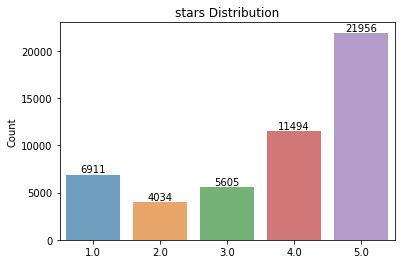

In [8]:
# load stars columns
x = review['stars'].value_counts()
x = x.sort_index()

plt.figure(figsize = (6,4))
ax = sns.barplot(x.index, x.values, alpha = 0.7)
plt.title('stars Distribution')
plt.ylabel('Count')

# show total value count in the top of each bar
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x()+ rect.get_width()/2, height + 5, label, ha= 'center', va = 'bottom')


<h3> Top Positive Reviewed Business </h3>

In [9]:
# select the business with stars > 3
top_review_business = review[review['stars'] > 3]
top_review_dictionary = {}

# create a dictionary to store the business_id, and numbers of rated review
for business_id in top_review_business['business_id'].values:
    if business_id in top_review_dictionary:
        top_review_dictionary[business_id] += 1
    else:
        top_review_dictionary[business_id] = 1
        
topbusiness = pd.DataFrame.from_dict(data = top_review_dictionary, orient = 'index')
topbusiness.reset_index(inplace = True)
topbusiness.columns = ['business_id', 'rated']

In [10]:
topbusiness.head()

business_id  rated
0  HQl28KMwrEKHqhFrrDqVNQ     25
1  IS4cv902ykd8wj1TR0N3-A      9
2  nlxHRv1zXGT0c0K51q3jDg      4
3  Pthe4qk5xh4n-ef-9bvMSg     31
4  FNCJpSn0tL9iqoY3JC73qw      5

In [11]:
# create a subtable from business
business_sub = business[['business_id', 'name', 'categories']]
business_sub

business_id                       name  \
0      f9NumwFMBDn751xgFiRbNA   The Range At Lake Norman   
1      Yzvjg0SayhoZgCljUJRF9Q          Carlos Santo, NMD   
2      XNoUzKckATkOD1hP6vghZg                    Felinus   
3      6OAZjbxqM5ol29BuHsil3w       Nevada House of Hose   
4      51M2Kk903DFYI6gnB5I6SQ    USE MY GUY SERVICES LLC   
...                       ...                        ...   
49995  rIDqNdJyXLNyrc07AhuQzg                 Party City   
49996  0Nb4piKDUVbedlrakwEUuw                   Del Taco   
49997  IeWhoGK5WfjlVWcRRHoDwQ     Landau Costume Jeweler   
49998  5nfeycwKUJKpb40JWlA9jw  Josie's Sweets and Treats   
49999  UMa-6QgbcQm6IHxPGuygVw   Miranda Delivery Service   

                                              categories  
0      Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...  
1      Health & Medical, Fitness & Instruction, Yoga,...  
2                       Pets, Pet Services, Pet Groomers  
3      Hardware Stores, Home Services, Building Suppl...  
4      Home Services, Plumbing, Electricians, Handyma...  
...                                                  ...  
49995          Party Supplies, Event Planning & Services  
49996                             Fast Food, Restaurants  
49997                                  Jewelry, Shopping  
49998  Food, Bakeries, Vegan, Gluten-Free, Restaurant...  
49999  Movers, Local Services, Home Services, Courier...  

[50000 rows x 3 columns]

In [12]:
top_business_data = pd.merge(topbusiness, right = business_sub, how = 'inner', on = 'business_id')
top_business_data

business_id  rated                                  name  \
0     HQl28KMwrEKHqhFrrDqVNQ     25                Deagan's Kitchen & Bar   
1     IS4cv902ykd8wj1TR0N3-A      9        Raising Cane's Chicken Fingers   
2     nlxHRv1zXGT0c0K51q3jDg      4                        Firehouse Subs   
3     Pthe4qk5xh4n-ef-9bvMSg     31                        Chon Thai Food   
4     FNCJpSn0tL9iqoY3JC73qw      5  Centennial Dermatology & Skin Cancer   
...                      ...    ...                                   ...   
7918  OXhnnR6LVt-v1riuM66rbQ      1                            Bike Sauce   
7919  Etj3Qsw7mH8IpeZU1JJX1A      1                                Kabuku   
7920  AXhr4wYYex8FnGqK3-ZdNQ      1          Weston GO/UP Express Station   
7921  t7Kb_ohebL1kzGuKq5ob3w      1                      Thai Massage Pro   
7922  pNlCFEtmyrGMX6dfbPoaXg      1                               Mochica   

                                             categories  
0     Restaurants, Gastropubs, Nightlife, American (...  
1     Fast Food, Restaurants, Sandwiches, Chicken Wings  
2             Restaurants, Delis, Sandwiches, Fast Food  
3                                     Restaurants, Thai  
4     Doctors, Cosmetic Surgeons, Dermatologists, He...  
...                                                 ...  
7918  Sporting Goods, Bike Repair/Maintenance, Shopp...  
7919                  Sushi Bars, Japanese, Restaurants  
7920  Hotels & Travel, Public Transportation, Transp...  
7921  Sports Wear, Massage, Sporting Goods, Gymnasti...  
7922                              Restaurants, Peruvian  

[7923 rows x 4 columns]

<AxesSubplot:title={'center':'Top 10 Positive Review Business'}, xlabel='name'>

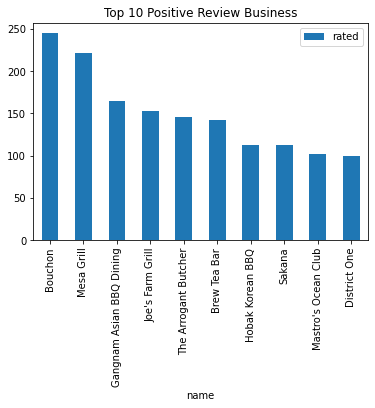

In [13]:
# create a barchart on top 10 postive reviews business:

top_business_data.sort_values('rated')[::-1][:10].plot(x = 'name', y = 'rated', kind = 'bar', title = 'Top 10 Positive Review Business')

In [14]:
# show top 10 business categories among the top 100 business with highest rated
category_data = top_business_data.sort_values('rated')[::-1][:100]
Category = {}

for val in category_data.categories.values:
    cal = val.split(',')
    for x in cal:
        if x in Category:
            Category[x] += 1
        else:
            Category[x] = 1
            
top_categories = pd.DataFrame.from_dict(data = Category, orient = 'index')
top_categories.reset_index(inplace = True)
top_categories.columns = ['business category', 'count']     


<AxesSubplot:title={'center':'top 10 business categories'}, xlabel='business category'>

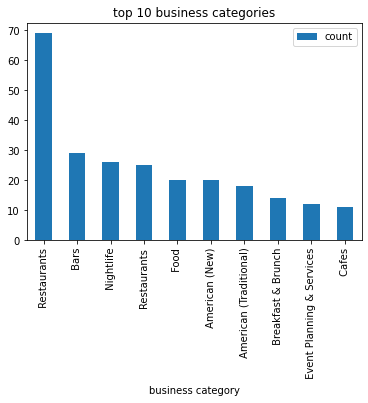

In [15]:
top_categories.sort_values('count')[::-1][:10].plot(x = 'business category', y = 'count', kind = 'bar', title = 'top 10 business categories')
   

<h3> Neutral Review Business </h3>

In [16]:
# select the business with stars = 3
Neu_review_business = review[review['stars'] == 3]
Neu_review_dictionary = {}

# create a dictionary to store the business_id, and numbers of rated review
for business_id in Neu_review_business['business_id'].values:
    if business_id in Neu_review_dictionary:
        Neu_review_dictionary[business_id] += 1
    else:
        Neu_review_dictionary[business_id] = 1
        
Neubusiness = pd.DataFrame.from_dict(data = Neu_review_dictionary, orient = 'index')
Neubusiness.reset_index(inplace = True)
Neubusiness.columns = ['business_id', 'rated']
Neubusiness

business_id  rated
0     poSV39UqEg-gpESXafS9-g      4
1     wSAGILK2CFbq5BVZ5D67-A      3
2     _ZfjpSEO5ntk-1hbnwCR4g     11
3     VnOGWODJ7ZREYij0rpB-Xw      2
4     9Eghhu_LzEJgDKNgisf3rg     10
...                      ...    ...
2674  ZjKpGYdQCQPxzkYWAsV56w      1
2675  AUp7fTAH7PwxecdSO_iAhw      1
2676  dDZ7No0gCZBcB6Nz_FSeLw      1
2677  gVLzkqIAHIWro_ZxkpjbFg      1
2678  41gRLv6cCcllPGDLyrqpVA      1

[2679 rows x 2 columns]

In [17]:
# Merge two table
Neu_business_data = pd.merge(Neubusiness, right = business_sub, how = 'inner', on = 'business_id')
Neu_business_data

business_id  rated                                    name  \
0     poSV39UqEg-gpESXafS9-g      4                        Angry Crab Shack   
1     wSAGILK2CFbq5BVZ5D67-A      3                                   Adega   
2     _ZfjpSEO5ntk-1hbnwCR4g     11                             Palms Place   
3     VnOGWODJ7ZREYij0rpB-Xw      2  Brewsters Brewing Company & Restaurant   
4     9Eghhu_LzEJgDKNgisf3rg     10        Scaddabush Italian Kitchen & Bar   
...                      ...    ...                                     ...   
2674  ZjKpGYdQCQPxzkYWAsV56w      1      Thailicious Authentic Thai & Vegan   
2675  AUp7fTAH7PwxecdSO_iAhw      1    California Pizza Kitchen at Chandler   
2676  dDZ7No0gCZBcB6Nz_FSeLw      1                  Wilde East Towne Honda   
2677  gVLzkqIAHIWro_ZxkpjbFg      1                    OBON Sushi Bar Ramen   
2678  41gRLv6cCcllPGDLyrqpVA      1         Embassy Grand Convention Centre   

                                             categories  
0     Restaurants, American (New), Seafood, Cajun/Cr...  
1     Mediterranean, Hotels, Beer, Wine & Spirits, B...  
2     Casinos, Arts & Entertainment, Resorts, Hotels...  
3     Nightlife, Food, Bars, Tapas Bars, Breweries, ...  
4     Wine Bars, Nightlife, Restaurants, Bars, Beer,...  
...                                                 ...  
2674               Restaurants, Thai, Vegetarian, Vegan  
2675  American (Traditional), Pizza, Salad, Restaura...  
2676  Car Dealers, Automotive, Auto Parts & Supplies...  
2677  Sushi Bars, Noodles, Japanese, Restaurants, Ra...  
2678  Venues & Event Spaces, Event Planning & Servic...  

[2679 rows x 4 columns]

<AxesSubplot:title={'center':'Top 10 Neu Review Business'}, xlabel='name'>

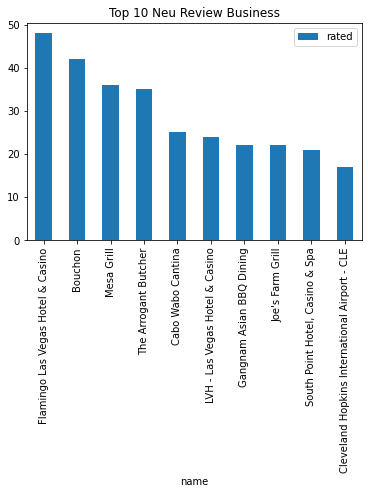

In [18]:
Neu_business_data.sort_values('rated')[::-1][:10].plot(x = 'name', y = 'rated', kind = 'bar', title = 'Top 10 Neu Review Business')

<AxesSubplot:title={'center':'top 10 Neutral review business categories'}, xlabel='business category'>

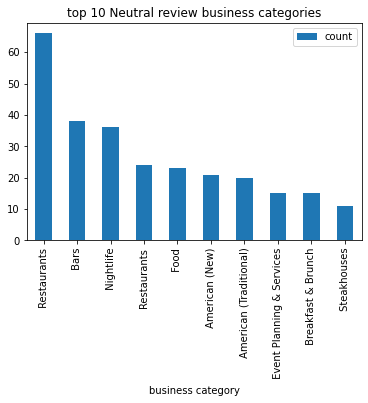

In [19]:
category_data = Neu_business_data.sort_values('rated')[::-1][:100]
Category = {}

for val in category_data.categories.values:
    cal = val.split(',')
    for x in cal:
        if x in Category:
            Category[x] += 1
        else:
            Category[x] = 1
            
Neu_categories = pd.DataFrame.from_dict(data = Category, orient = 'index')
Neu_categories.reset_index(inplace = True)
Neu_categories.columns = ['business category', 'count']     
Neu_categories.sort_values('count')[::-1][:10].plot(x = 'business category', y = 'count', kind = 'bar', title = 'top 10 Neutral review business categories')


<h3> Negative Review Business </h3>

In [20]:
# select those business with less than 3 stars
Negative_review_business = review[review['stars'] < 3]
Negative_review_dictionary = {}

# create a dictionary to store the business_id, and numbers of rated review
for business_id in Negative_review_business['business_id'].values:
    if business_id in Negative_review_dictionary:
        Negative_review_dictionary[business_id] += 1
    else:
        Negative_review_dictionary[business_id] = 1
        
Negabusiness = pd.DataFrame.from_dict(data = Negative_review_dictionary, orient = 'index')
Negabusiness.reset_index(inplace = True)
Negabusiness.columns = ['business_id', 'rated']
Negabusiness

business_id  rated
0     -MhfebM0QIsKt87iDN-FNw      4
1     lbrU8StCq3yDfr-QMnGrmQ      1
2     5JxlZaqCnk1MnbgRirs40Q      2
3     7Ka9Pd8X9SRHs1D5EcleLg      2
4     d4qwVw4PcN-_2mK2o1Ro1g     22
...                      ...    ...
4612  wkChwNgC7YSc8KZgXiGT0Q      1
4613  YYEm5MR6HMCQYI0k1wVnXA      1
4614  rGE86nbV-k9RZpMUfTBX0A      1
4615  FworCJK5fCPuQ6vD8Vs-YQ      1
4616  14T3cCQcTjAHzoE_4r1bxw      1

[4617 rows x 2 columns]

In [21]:
# Merge two table
Nega_business_data = pd.merge(Negabusiness, right = business_sub, how = 'inner', on = 'business_id')
Nega_business_data

business_id  rated                          name  \
0     -MhfebM0QIsKt87iDN-FNw      4  Bellagio Gallery of Fine Art   
1     lbrU8StCq3yDfr-QMnGrmQ      1                Rio Hair Salon   
2     5JxlZaqCnk1MnbgRirs40Q      2       Cabo Mexican Restaurant   
3     7Ka9Pd8X9SRHs1D5EcleLg      2                      PoolServ   
4     d4qwVw4PcN-_2mK2o1Ro1g     22                     Pink Taco   
...                      ...    ...                           ...   
4612  wkChwNgC7YSc8KZgXiGT0Q      1                Skyfall Lounge   
4613  YYEm5MR6HMCQYI0k1wVnXA      1                       Wendy's   
4614  rGE86nbV-k9RZpMUfTBX0A      1  5 Star Presidential Cleaning   
4615  FworCJK5fCPuQ6vD8Vs-YQ      1                   De Catarina   
4616  14T3cCQcTjAHzoE_4r1bxw      1                Bellagio Pizza   

                                             categories  
0     Shopping, Arts & Entertainment, Art Galleries,...  
1                            Beauty & Spas, Hair Salons  
2                                  Restaurants, Mexican  
3     Contractors, Pool & Hot Tub Service, Swimming ...  
4                                  Mexican, Restaurants  
...                                                 ...  
4612  Champagne Bars, Cocktail Bars, Lounges, Nightl...  
4613                    Restaurants, Fast Food, Burgers  
4614  Professional Services, Home Services, Contract...  
4615          Shopping, Leather Goods, Fashion, Luggage  
4616                           Restaurants, Food, Pizza  

[4617 rows x 4 columns]

<AxesSubplot:title={'center':'Top 10 Negative Review Business'}, xlabel='name'>

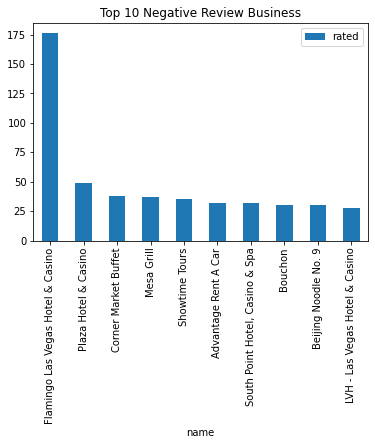

In [22]:
Nega_business_data.sort_values('rated')[::-1][:10].plot(x = 'name', y = 'rated', kind = 'bar', title = 'Top 10 Negative Review Business')

<AxesSubplot:title={'center':'top 10 Negative review business categories'}, xlabel='business category'>

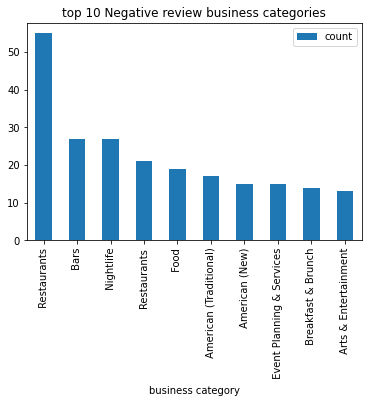

In [23]:
category_data = Nega_business_data.sort_values('rated')[::-1][:100]
Category = {}

for val in category_data.categories.values:
    cal = val.split(',')
    for x in cal:
        if x in Category:
            Category[x] += 1
        else:
            Category[x] = 1
            
Nega_categories = pd.DataFrame.from_dict(data = Category, orient = 'index')
Nega_categories.reset_index(inplace = True)
Nega_categories.columns = ['business category', 'count']     
Nega_categories.sort_values('count')[::-1][:10].plot(x = 'business category', y = 'count', kind = 'bar', title = 'top 10 Negative review business categories')


<h3> Most Frequent Words in Negative Reviews </h3>

In [24]:
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords

import re
import string
import nltk

In [25]:
# Create a columns with categorical values "Positive, Neutral, Negative"
review['target'] = 0

conditions = [
    (review['stars'] < 3),  # negative review
    (review['stars'] == 3), # neutral review
    (review['stars'] > 3)   # positive review
    ]

# create a list of the values we want to assign for each condition
values = ['0', '1', '2']

# create a new column and use np.select to assign values to it using our lists as arguments
review['target'] = np.select(conditions, values)

# display updated DataFrame
review

review_id                 user_id             business_id  \
0      xQY8N_XvtGbearJ5X4QryQ  OwjRMXRC0KyPrIlcjaXeFQ  -MhfebM0QIsKt87iDN-FNw   
1      UmFMZ8PyXZTY2QcwzsfQYA  nIJD_7ZXHq-FX8byPMOkMQ  lbrU8StCq3yDfr-QMnGrmQ   
2      LG2ZaYiOgpr2DK_90pYjNw  V34qejxNsCbcgD8C0HVk-Q  HQl28KMwrEKHqhFrrDqVNQ   
3      i6g_oA9Yf9Y31qt0wibXpw  ofKDkJKXSKZXu5xJNGiiBQ  5JxlZaqCnk1MnbgRirs40Q   
4      6TdNDKywdbjoTkizeMce8A  UgMW8bLE0QMJDCkQ1Ax5Mg  IS4cv902ykd8wj1TR0N3-A   
...                       ...                     ...                     ...   
49995  Wi8vp2lk3C27716iZYhtrQ  -SXbI1mQSFHkUK8MJtwQNw  i6gKYG_YFuF5o90jPuWYvw   
49996  vhy0XzfkdNL4z6B4zd5P1Q  JEDRhFdrscbsWierJA0-jQ  V2oe1HVgNK0He9Mf3Q17AA   
49997  Sl3p2RqPnhBTXZoAWsKX5g  Q5oEbIyoZsIoQCras9CNvA  EcRL1BpBvvQ5LnzgtFr8Gw   
49998  IYgfML6hBWRcKKU3EUE01Q  i_6lhTVqIRsZvggvZp7lng  4m_hApwQ054v3ue_OxFmGw   
49999  Ai-IIJHCI0btHsBze1v-YA  DnW5KhpV4ss_yqtIS78yUQ  HxSINQAplSFAn6of-wexcA   

       stars  useful  funny  cool  \
0        2.0       5      0     0   
1        1.0       1      1     0   
2        5.0       1      0     0   
3        1.0       0      0     0   
4        4.0       0      0     0   
...      ...     ...    ...   ...   
49995    2.0       0      0     0   
49996    3.0       1      1     1   
49997    5.0       1      1     2   
49998    3.0       0      0     0   
49999    1.0       0      0     0   

                                                    text                 date  \
0      As someone who has worked with many museums, I...  2015-04-15 05:21:16   
1      I am actually horrified this place is still in...  2013-12-07 03:16:52   
2      I love Deagan's. I do. I really do. The atmosp...  2015-12-05 03:18:11   
3      Dismal, lukewarm, defrosted-tasting "TexMex" g...  2011-05-27 05:30:52   
4      Oh happy day, finally have a Canes near my cas...  2017-01-14 21:56:57   
...                                                  ...                  ...   
49995  There was this cashier that's shit rude, and e...  2018-04-15 21:31:07   
49996  I love pierogi's. We showed up got a table and...  2017-08-08 04:26:34   
49997  An impromptu Sunday night dinner invite from m...  2008-12-08 06:01:17   
49998  I'd give this 3.5 stars if I could.\n\nThe spa...  2015-03-05 21:28:31   
49999  I have visited this restaurant many times and ...  2017-09-10 03:43:01   

      target  
0          0  
1          0  
2          2  
3          0  
4          2  
...      ...  
49995      0  
49996      1  
49997      2  
49998      1  
49999      0  

[50000 rows x 10 columns]

In [26]:
pos = review[review['target'] == '2']['text']
neu = review[review['target'] == '1']['text']
neg = review[review['target'] == '0']['text']

In [27]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /Users/henryzou1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:
pos = pos.tolist()
neu = neu.tolist()
neg = neg.tolist()

<h3> Positive Review WordCloud </h3>

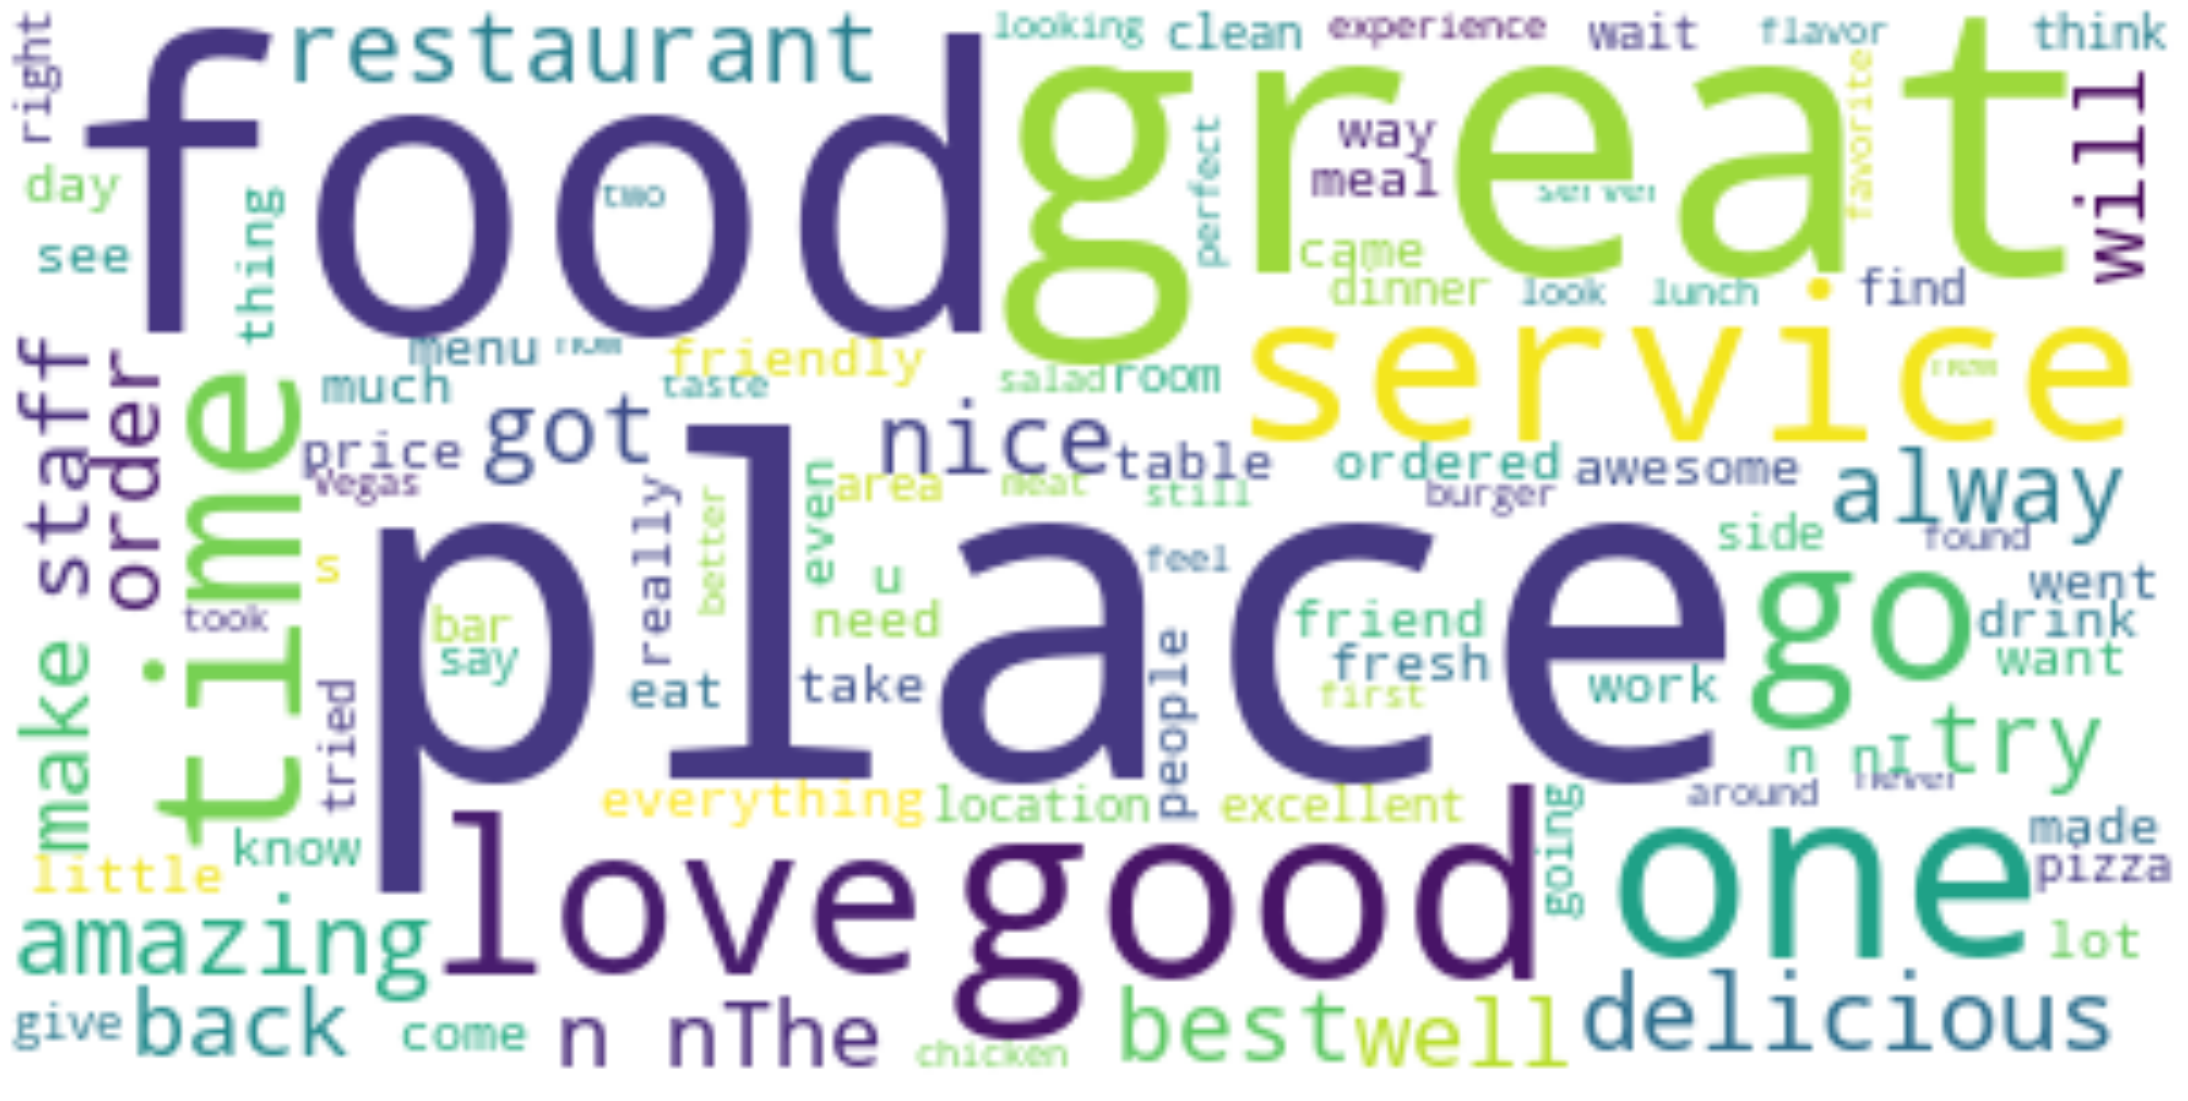

In [29]:
pos_wc = WordCloud(background_color = 'white', max_words = 100)
pos_wc.generate(str(pos))

plt.figure(figsize = (50,20))
plt.imshow(pos_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

<h3> Negative Review WordCloud </h3>

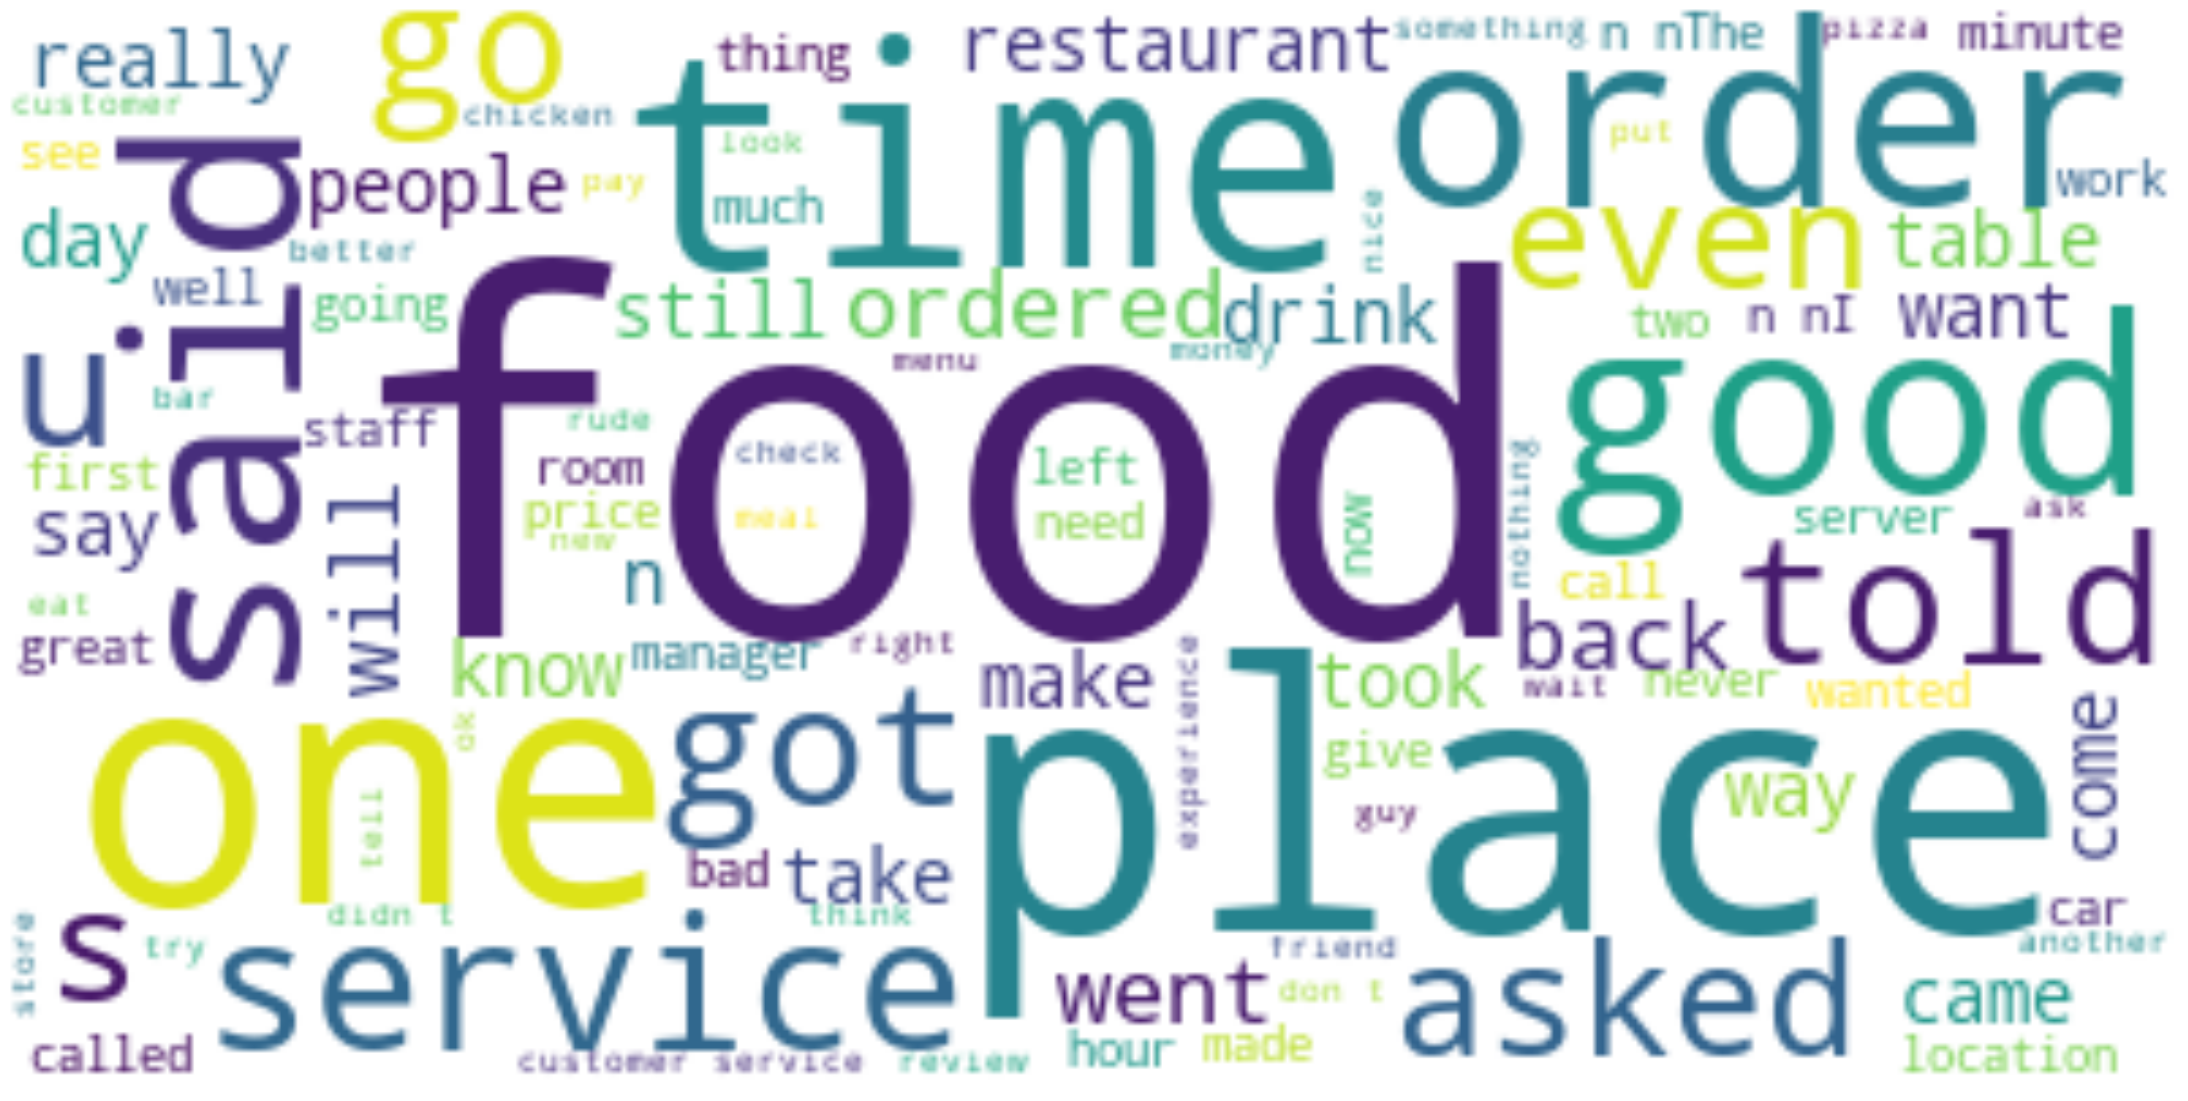

In [30]:
Neg_wc = WordCloud(background_color = 'white', max_words = 100)
Neg_wc.generate(str(neg))

plt.figure(figsize = (50,20))
plt.imshow(Neg_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

<h3> Neutrual Review WordCloud </h3>

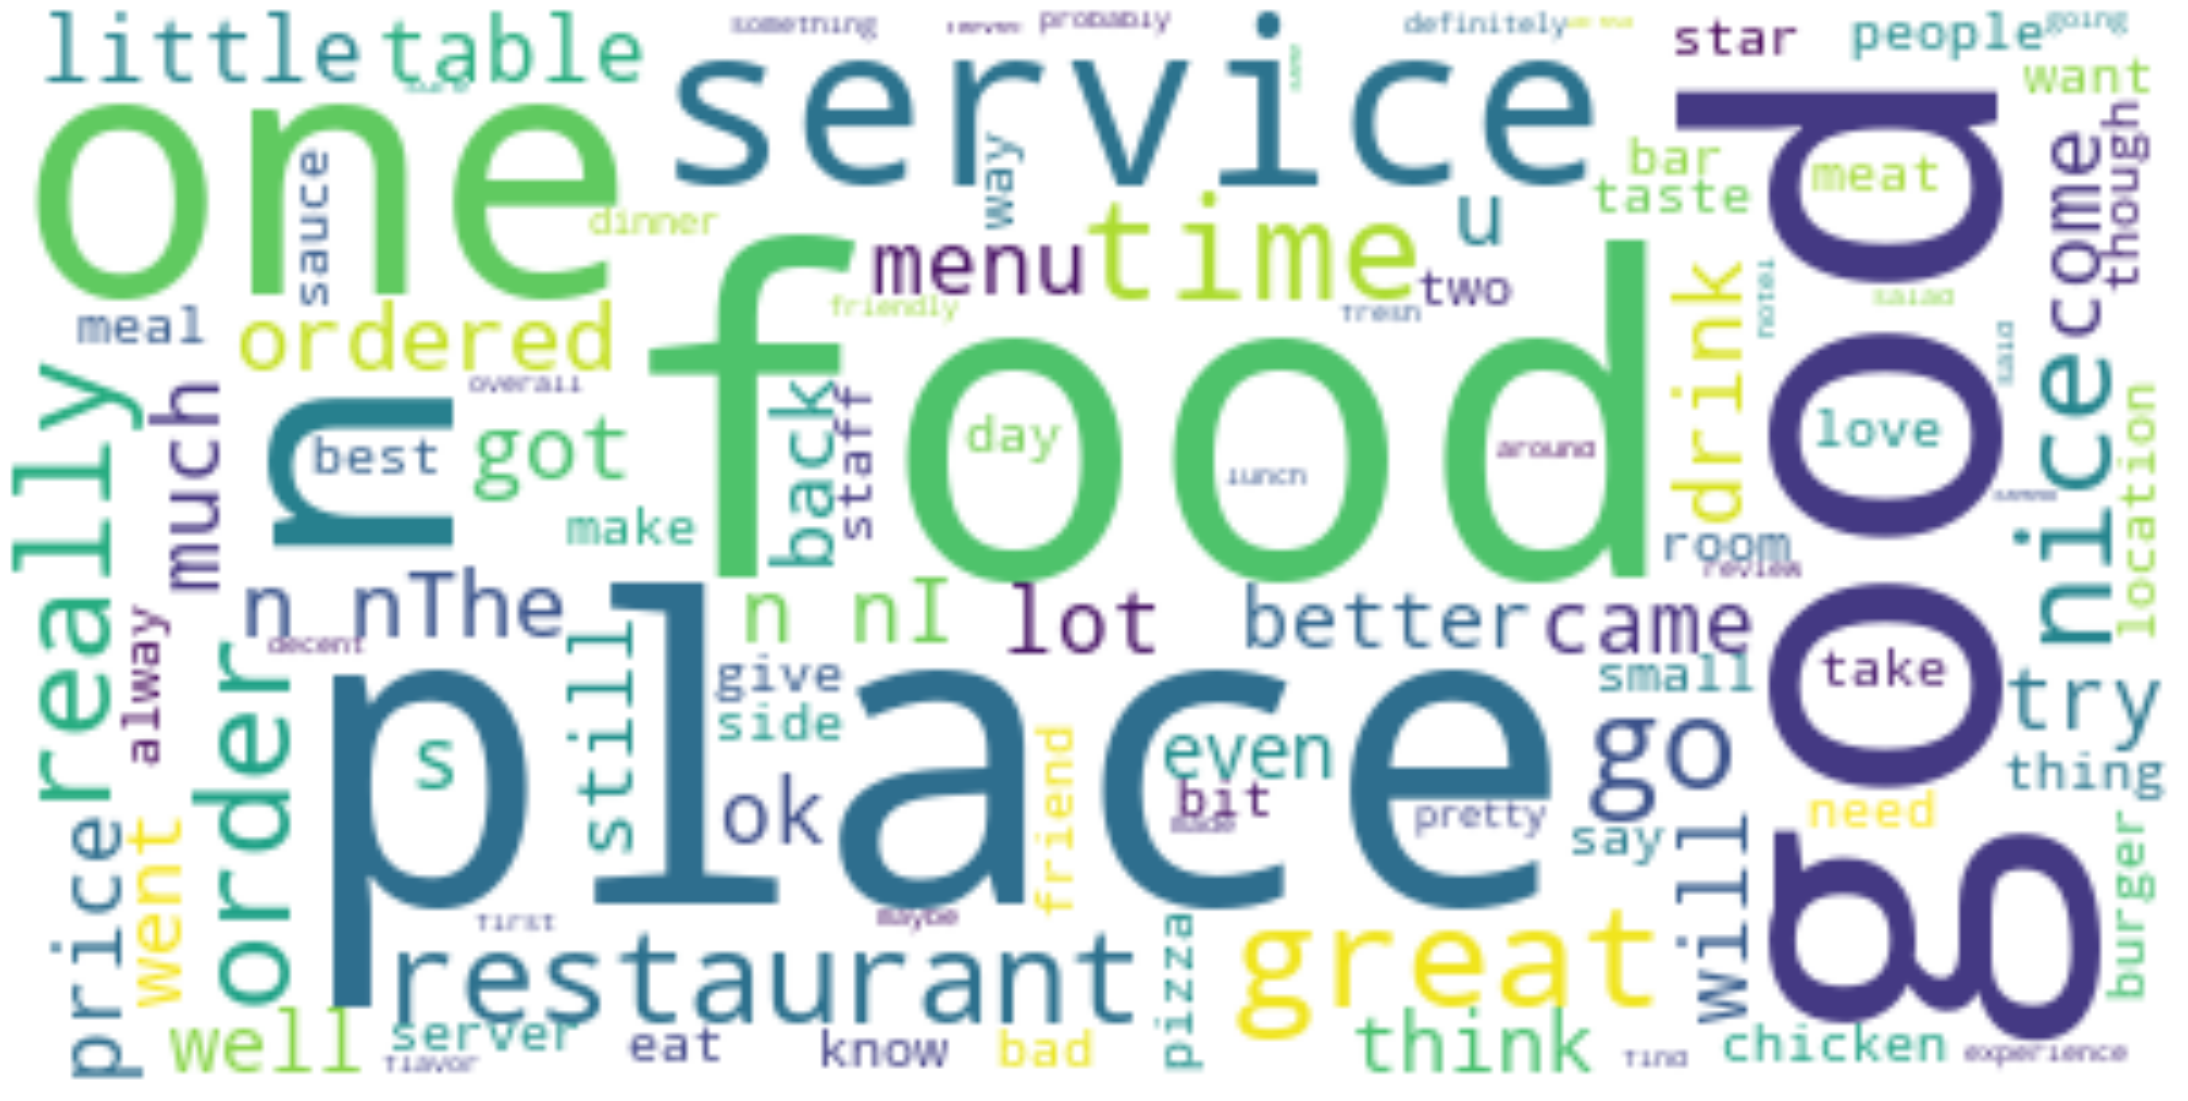

In [31]:
Neu_wc = WordCloud(background_color = 'white', max_words = 100)
Neu_wc.generate(str(neu))

plt.figure(figsize = (50,20))
plt.imshow(Neu_wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

<h3> Using NLP to Predict review manner </h3>

In [32]:
import re

def text_cleaning(text):
    text = re.sub(r'http\S+', ' ', text) # drop all URL link
    text = re.sub('@[^\s]*', ' ', text) # drop mention sign @
    text = re.sub('#[^\s]*', ' ', text) # drop hashtages
    text = re.sub('[0-9]*[+-:]*[0-9]+', ' ', text) # drop numbers
    text = re.sub("'s", "", text)
    return text

In [33]:
# applying text cleaning function to our text
review['text'] = review['text'].apply(lambda text: text_cleaning(text))

In [34]:
review['text']

0        As someone who has worked with many museums, I...
1        I am actually horrified this place is still in...
2        I love Deagan. I do. I really do. The atmosphe...
3        Dismal, lukewarm, defrosted-tasting "TexMex" g...
4        Oh happy day, finally have a Canes near my cas...
                               ...                        
49995    There was this cashier that shit rude, and end...
49996    I love pierogi. We showed up got a table and w...
49997    An impromptu Sunday night dinner invite from m...
49998    I'd give this   stars if I could.\n\nThe space...
49999    I have visited this restaurant many times and ...
Name: text, Length: 50000, dtype: object

In [35]:
English_stop_words = set(stopwords.words('english'))

In [36]:
def text_process(mess):
    """
    1. remove punctuations
    2. remove stop words
    3. return the list of clean text words
    """
    
    nopunc = [ch for ch in mess if ch not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in English_stop_words]

In [37]:
review['text'].apply(text_process)

0        [someone, worked, many, museums, eager, visit,...
1        [actually, horrified, place, still, business, ...
2        [love, Deagan, really, atmosphere, cozy, festi...
3        [Dismal, lukewarm, defrostedtasting, TexMex, g...
4        [Oh, happy, day, finally, Canes, near, casa, Y...
                               ...                        
49995    [cashier, shit, rude, ended, getting, drink, w...
49996    [love, pierogi, showed, got, table, waited, wa...
49997    [impromptu, Sunday, night, dinner, invite, sig...
49998    [Id, give, stars, could, space, gorgeous, ambi...
49999    [visited, restaurant, many, times, food, amazi...
Name: text, Length: 50000, dtype: object

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = review['text']
y = review['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)

In [40]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40000,)
(10000,)
(40000,)
(10000,)


<h3> Vectorizing the text using TF_IDF (term frequency–inverse document frequency) </h3>

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
vec1 = TfidfVectorizer(min_df = 100, tokenizer = text_process, stop_words = {'english'}, ngram_range = (1,3)).fit(X_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [43]:
X_train_1 = vec1.transform(X_train)
X_test_1 = vec1.transform(X_test)

In [45]:
df_words = pd.DataFrame(columns = vec1.get_feature_names(), data = X_train_1.toarray())
df_words

able  able get  absolute  absolutely  absolutely amazing  \
0       0.0       0.0       0.0    0.000000                 0.0   
1       0.0       0.0       0.0    0.000000                 0.0   
2       0.0       0.0       0.0    0.000000                 0.0   
3       0.0       0.0       0.0    0.000000                 0.0   
4       0.0       0.0       0.0    0.000000                 0.0   
...     ...       ...       ...         ...                 ...   
39995   0.0       0.0       0.0    0.000000                 0.0   
39996   0.0       0.0       0.0    0.000000                 0.0   
39997   0.0       0.0       0.0    0.000000                 0.0   
39998   0.0       0.0       0.0    0.000000                 0.0   
39999   0.0       0.0       0.0    0.094255                 0.0   

       absolutely delicious  absolutely love   ac  accept  access  ...  youd  \
0                       0.0              0.0  0.0     0.0     0.0  ...   0.0   
1                       0.0              0.0  0.0     0.0     0.0  ...   0.0   
2                       0.0              0.0  0.0     0.0     0.0  ...   0.0   
3                       0.0              0.0  0.0     0.0     0.0  ...   0.0   
4                       0.0              0.0  0.0     0.0     0.0  ...   0.0   
...                     ...              ...  ...     ...     ...  ...   ...   
39995                   0.0              0.0  0.0     0.0     0.0  ...   0.0   
39996                   0.0              0.0  0.0     0.0     0.0  ...   0.0   
39997                   0.0              0.0  0.0     0.0     0.0  ...   0.0   
39998                   0.0              0.0  0.0     0.0     0.0  ...   0.0   
39999                   0.0              0.0  0.0     0.0     0.0  ...   0.0   

       youll  young     youre  youre going  youre looking  youve  yum  \
0        0.0    0.0  0.000000          0.0            0.0    0.0  0.0   
1        0.0    0.0  0.000000          0.0            0.0    0.0  0.0   
2        0.0    0.0  0.077796          0.0            0.0    0.0  0.0   
3        0.0    0.0  0.000000          0.0            0.0    0.0  0.0   
4        0.0    0.0  0.000000          0.0            0.0    0.0  0.0   
...      ...    ...       ...          ...            ...    ...  ...   
39995    0.0    0.0  0.000000          0.0            0.0    0.0  0.0   
39996    0.0    0.0  0.000000          0.0            0.0    0.0  0.0   
39997    0.0    0.0  0.000000          0.0            0.0    0.0  0.0   
39998    0.0    0.0  0.000000          0.0            0.0    0.0  0.0   
39999    0.0    0.0  0.000000          0.0            0.0    0.0  0.0   

          yummy  zero  
0      0.000000   0.0  
1      0.000000   0.0  
2      0.000000   0.0  
3      0.000000   0.0  
4      0.211491   0.0  
...         ...   ...  
39995  0.000000   0.0  
39996  0.000000   0.0  
39997  0.000000   0.0  
39998  0.000000   0.0  
39999  0.000000   0.0  

[40000 rows x 3093 columns]

In [48]:
# count the most frequent words
word_counts = np.array(np.sum(X_train_1, axis = 0)).reshape((-1,))
words = np.array(vec1.get_feature_names())
words_df = pd.DataFrame({'word': words, 'count': word_counts})
words_df.sort_values(by = 'count', ascending = False).head(5)

word        count
1009     food  1316.014317
1191    great  1282.452979
1151     good  1218.882050
1994    place  1206.042834
2384  service  1012.141901

<h3> Using SMOTE to balance our target columns </h3>

In [50]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 15)
X_balance, y_balance = sm.fit_resample(X_train_1, y_train)
y_balance.value_counts()

1    26725
0    26725
2    26725
Name: target, dtype: int64

<h3> Constructing Models </h3>

<h5> Logistic Regression </h5>

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

lr = LogisticRegression(random_state = 15)
lr.fit(X_balance, y_balance)
lr_pred_y = lr.predict(X_test_1)

print('Score on training set is {}'.format(lr.score(X_train_1, y_train)))
print('Score on test set is {}'.format(lr.score(X_test_1, y_test)))

Score on training set is 0.84515
Score on test set is 0.801


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [63]:
a1 = confusion_matrix(y_test, lr_pred_y)
conf_lr = pd.DataFrame(a1, columns = ['Predicted 0', 'Predicted 1', 'Predicted 2'], index = ['True 0', 'True 1', 'True 2'])
conf_lr

Predicted 0  Predicted 1  Predicted 2
True 0         1730          350           89
True 1          224          625          257
True 2          233          837         5655

In [60]:
accuracy_score(y_test, lr_pred_y)

0.801

<h5> Random Forest </h5>

In [62]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 15)
rf.fit(X_balance, y_balance)

rf_pred_y = rf.predict(X_test_1)
print('Score on training set is {}'.format(rf.score(X_train_1, y_train)))
print('Score on test set is {}'.format(rf.score(X_test_1, y_test)))

Score on training set is 0.999875
Score on test set is 0.7886


In [65]:
a2 = confusion_matrix(y_test, rf_pred_y)
conf_rf = pd.DataFrame(a2, columns = ['Predicted 0', 'Predicted 1', 'Predicted 2'], index = ['True 0', 'True 1', 'True 2'])
conf_rf


Predicted 0  Predicted 1  Predicted 2
True 0         1556          179          434
True 1          225          322          559
True 2          294          423         6008

In [66]:
print('accuracy score is {}'.format(accuracy_score(y_test, rf_pred_y)))

accuracy score is 0.7886


<h5> Test Result </h5>

In [74]:
bad_comment = "the waiting time is too long and the service is bad"
good_comment = "the food is tasty and service is great"
neutral_comment = "food is okay, still need improvement"

In [80]:
print('input string is: {}'.format(bad_comment))
print('Logistic Regression Model Result:', lr.predict(vec1.transform([text_cleaning(bad_comment)])))
print('Random Forest Model Result:', rf.predict(vec1.transform([text_cleaning(bad_comment)])))


input string is: the waiting time is too long and the service is bad
Logistic Regression Model Result: ['1']
Random Forest Model Result: ['0']


In [81]:
print('input string is: {}'.format(good_comment))
print('Logistic Regression Model Result:', lr.predict(vec1.transform([text_cleaning(good_comment)])))
print('Random Forest Model Result:', rf.predict(vec1.transform([text_cleaning(good_comment)])))


input string is: the food is tasty and service is great
Logistic Regression Model Result: ['2']
Random Forest Model Result: ['2']


In [77]:
print('input string is: {}'.format(neutral_comment))
print('Logistic Regression Model Result:', lr.predict(vec1.transform([text_cleaning(neutral_comment)])))
print('Random Forest Model Result:', rf.predict(vec1.transform([text_cleaning(neutral_comment)])))


input string is: food is okay, still need improvement
Logistic Regression Model Result: ['1']
Random Forest Model Result: ['1']
